### Findings


- Item 5117 was the third most popular item, and the first most popular one without a promotion date.


- Item 5117 has a stable price, within the range 18-22 and its orders were mostly few quantities of 1-3.


- Most purchases occurred during the hours from 9:00 to 22:00, on Days 9, 17 and 21, during the months Jan, March and May, and on Mondays, Tuesdays and Saturdays.


- Spikes in demand were seen on specific days of the month, so daily resampled data should not be ignored when making forecasts.


- Hence, daily, weekly and biweekly resampled data would be most appropriate to make forecasts on since daily resampling offers high resolution data while biweekly resampling offers a broader view.


### Tasks


- Item 5117 was chosen to be the product of study because there are no promotions for it.


- Item 5117 was extracted from the `orders` dataset and its features were explored in detail with barplots.


- `Hour`, `Day`, `Month` and `Day of Week` columns were added to the `item5117` dataset to explore the demand at different times.


- The prepared dataset (with the added columns) was saved as a pickle file into the home directory.


- Afterwards, the index was changed to the `time` column to make it a time series and the time dependency of Item 5117 demand was investigated by resampling data in terms of hourly, daily, weekly, biweekly and monthly data.


**Ismail Dawoodjee | 12:25 PM 09-June-2020**

# Data Preparation 

This notebook will document the process of extracting one particular product to make a forecast on and the preparation methods for doing that.

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style = 'whitegrid')

In [2]:
#from pandas import Series
import datetime as dt

In [3]:
infos = pd.read_pickle('infos.pkl')
items = pd.read_pickle('items.pkl')
orders = pd.read_pickle('orders.pkl')

### Choosing an Item to Study

In [28]:
orders.groupby(by = 'itemID').sum().sort_values(by = 'order')

,transactID,order,salesPrice
itemID,,,
10463,2262034,1,282.16
9715,2270445,1,83.96
4821,2277621,1,33.69
4820,2275383,1,25.89
4819,2264359,1,22.48
...,...,...,...
5039,3187359915,8444,21543.41
4297,2353185494,8675,29062.80
5117,5845174608,9100,156487.53


In [50]:
infos[infos['itemID'] == 7789]

,itemID,simulationPrice,promotion
7788,7789,12.14,2018-06-30


In [51]:
infos[infos['itemID'] == 5035]

,itemID,simulationPrice,promotion
5034,5035,31.44,2018-07-04


In [52]:
infos[infos['itemID'] == 5117]

,itemID,simulationPrice,promotion
5116,5117,18.61,NaN


- From the previous exploration, we found Item 7789 to be the most popular product, with 12184 units sold. 
- However, Item 7789 and 5035 has promotion dates, making the forecast a tad more complex to do.
- Hence, **Item 5117** will be chosen to be studied in this notebook, because it is the 3rd most popular product (more data for the forecasting algorithms to work with) and because there are no promotions for it.
- Items with promotions will be dealt with separately.

### Item 5117

Extract Item 5117 orders and explore it in detail.

In [54]:
items[items['itemID'] == 5117]

,itemID,brand,manufacturer,customerRating,modifiedRating,category1,category2,category3,recommendedRetailPrice
5116,5117,90,80,3.26,3.5,5,21,4,26.68


In [9]:
item5117 = orders[orders['itemID'] == 5117]

In [59]:
item5117.shape

(8063, 5)

In [60]:
item5117.columns

Index(['time', 'transactID', 'itemID', 'order', 'salesPrice'], dtype='object')

In [91]:
item5117.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8063 entries, 22772 to 2143692
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   time        8063 non-null   datetime64[ns]
 1   transactID  8063 non-null   int64         
 2   itemID      8063 non-null   int64         
 3   order       8063 non-null   int64         
 4   salesPrice  8063 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 378.0 KB


In [62]:
item5117.describe()

,transactID,itemID,order,salesPrice
count,8.063000e+03,8063.0,8063.000000,8063.000000
mean,7.249379e+05,5117.0,1.128612,19.408102
std,5.948575e+05,0.0,0.434443,1.183708
min,3.820000e+02,5117.0,1.000000,10.830000
25%,5.446750e+04,5117.0,1.000000,18.690000
50%,6.230860e+05,5117.0,1.000000,18.690000
75%,1.454220e+06,5117.0,1.000000,21.020000
max,2.293289e+06,5117.0,10.000000,21.790000


In [10]:
item5117

,time,transactID,itemID,order,salesPrice
22772,2018-01-05 16:39:57,2263797,5117,1,10.83
28163,2018-01-05 22:22:29,2274466,5117,1,10.83
28172,2018-01-05 22:45:16,2263621,5117,1,10.83
30232,2018-01-06 22:19:42,2258538,5117,1,10.83
31498,2018-01-07 12:07:15,2283579,5117,1,10.83
...,...,...,...,...,...
2095502,2018-06-25 06:14:24,1959904,5117,1,17.13
2095525,2018-06-25 06:27:58,1959926,5117,1,17.13
2098671,2018-06-25 13:53:11,2291800,5117,1,17.13
2116125,2018-06-26 18:14:06,2267480,5117,1,18.61


In [68]:
item5117['order'].value_counts()

1     7225
2      704
3       95
4       22
5       12
6        4
10       1
Name: order, dtype: int64

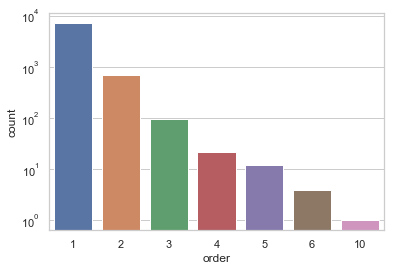

In [69]:
sns.countplot(item5117['order'])
plt.yscale('log')

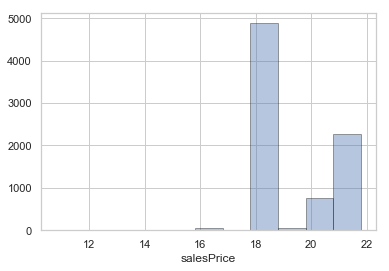

In [74]:
sns.distplot(item5117['salesPrice'], kde = False, bins = 11, hist_kws = dict(edgecolor = "k"))

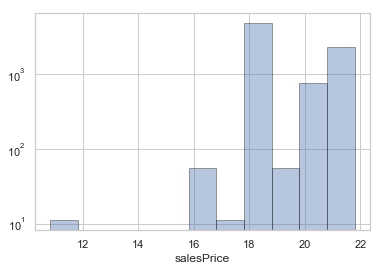

In [75]:
sns.distplot(item5117['salesPrice'], kde = False, bins = 11, hist_kws = dict(edgecolor = "k"))
plt.yscale('log')

- Item 5117 has a fairly stable price, with a mean of 19.41 and a low standard deviation of 1.18.
- The majority of orders (over 8000) are in the range 1-3.
- Although the median price is 18.69, prices can increase up to 21.79, in the 20-22 range, and occasionally decrease down to about 16 and 11.


- Add hour, day, month and day of week columns to the `item5117` dataset.
- Remove the `transactID` and `itemID` columns.

In [12]:
item5117.loc[:,'Hour'] = item5117['time'].dt.hour
item5117.loc[:,'Day'] = item5117['time'].dt.day
item5117.loc[:,'Month'] = item5117['time'].dt.month
item5117.loc[:,'Day of Week'] = item5117['time'].dt.dayofweek # 0 is Monday, 6 is Sunday

In [13]:
item5117.drop(labels = ['transactID','itemID'], axis = 1, inplace = True)

C:\Anaconda3\envs\nlp_course\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
item5117.reset_index(drop = True, inplace = True)

In [15]:
item5117.head()

,time,order,salesPrice,Hour,Day,Month,Day of Week
0,2018-01-05 16:39:57,1,10.83,16,5,1,4
1,2018-01-05 22:22:29,1,10.83,22,5,1,4
2,2018-01-05 22:45:16,1,10.83,22,5,1,4
3,2018-01-06 22:19:42,1,10.83,22,6,1,5
4,2018-01-07 12:07:15,1,10.83,12,7,1,6


- The above `item5117` dataset is prepared for further exploration and analysis.
- Save this dataset to the home directory in pickle format to preserve datetime type.

In [30]:
item5117.to_pickle('item5117.pkl')

- Now, the dataset can be converted to a time series by changing its index to the `time` column.

In [19]:
item5117 = item5117.set_index('time')

In [21]:
item5117.head()

,order,salesPrice,Hour,Day,Month,Day of Week
time,,,,,,
2018-01-05 16:39:57,1,10.83,16,5,1,4
2018-01-05 22:22:29,1,10.83,22,5,1,4
2018-01-05 22:45:16,1,10.83,22,5,1,4
2018-01-06 22:19:42,1,10.83,22,6,1,5
2018-01-07 12:07:15,1,10.83,12,7,1,6


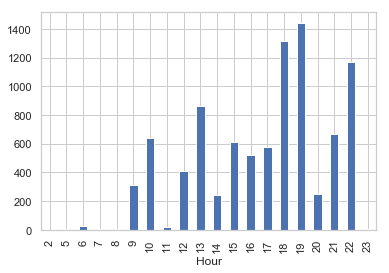

In [20]:
item5117.groupby(by = 'Hour')['order'].sum().plot.bar()
#plt.yscale('log')

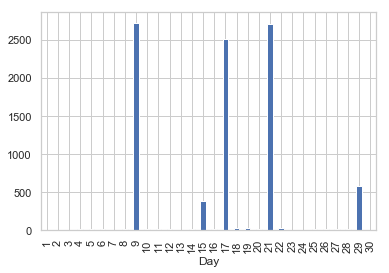

In [53]:
item5117.groupby(by = 'Day')['order'].sum().plot.bar()
#plt.yscale('log')

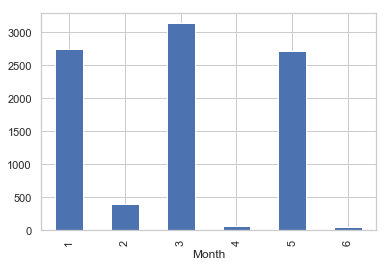

In [45]:
item5117.groupby(by = 'Month')['order'].sum().plot.bar()

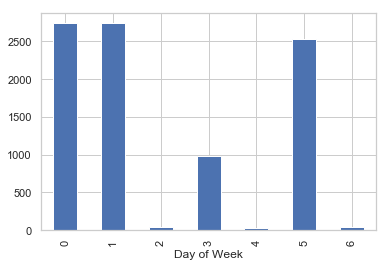

In [22]:
item5117.groupby(by = 'Day of Week')['order'].sum().plot.bar()

- Most purchases occurred during the hours from 9:00 to 22:00, on Days 9, 17 and 21, during the months Jan, March and May, and on Mondays, Tuesdays and Saturdays. 
- These patterns may be useful information to know but they are not enough for making a forecast.


- The time dependency of price and quantity demanded can be explored by resampling the data as a time series in the hourly, daily, weekly, bi-weekly and monthly intervals.

In [26]:
hourly5117_orders = item5117['order'].resample('H').sum # can't plot hourly resampled data
daily5117_orders = item5117['order'].resample('D').sum()
weekly5117_orders = item5117['order'].resample('W').sum()
biweekly5117_orders = item5117['order'].resample('2W').sum()
monthly5117_orders = item5117['order'].resample('M').sum()

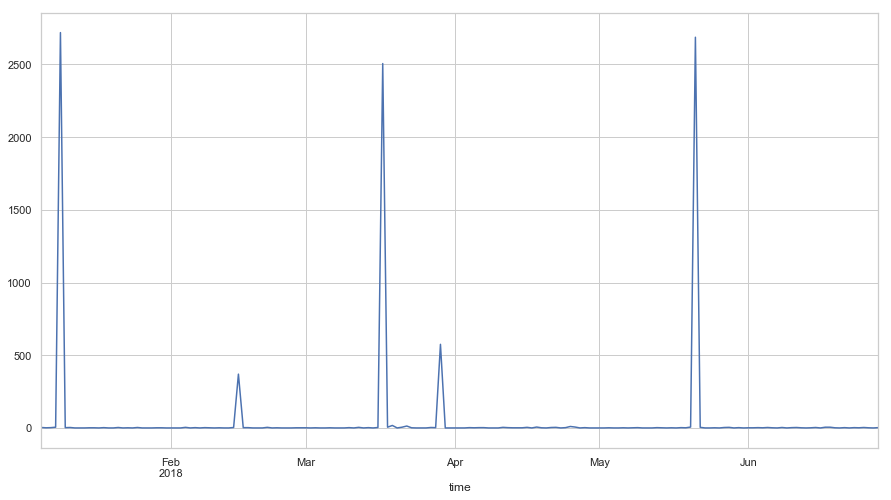

In [29]:
daily5117_orders.plot(figsize=(15,8))

In [40]:
daily5117_orders[daily5117_orders > 20]

time
2018-01-09    2719
2018-02-15     370
2018-03-17    2506
2018-03-29     575
2018-05-21    2687
Name: order, dtype: int64

- These are the days at which demand spikes way above 20 units occurred for some reason.

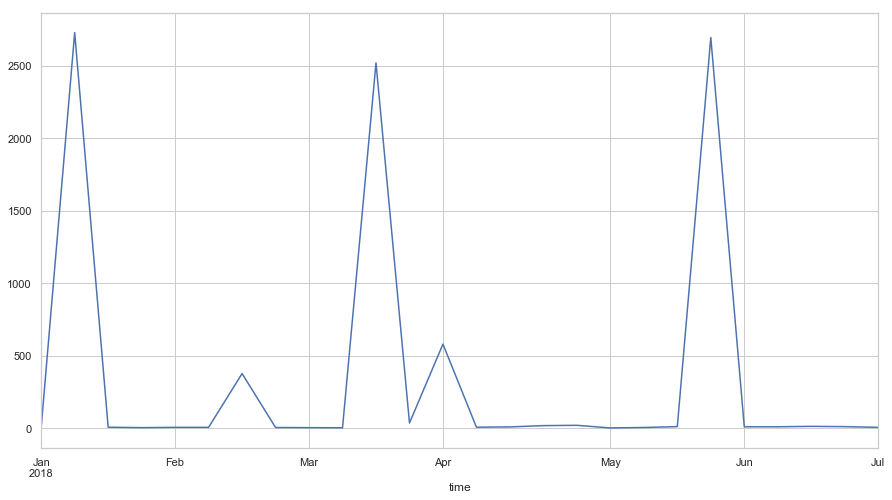

In [30]:
weekly5117_orders.plot(figsize=(15,8))

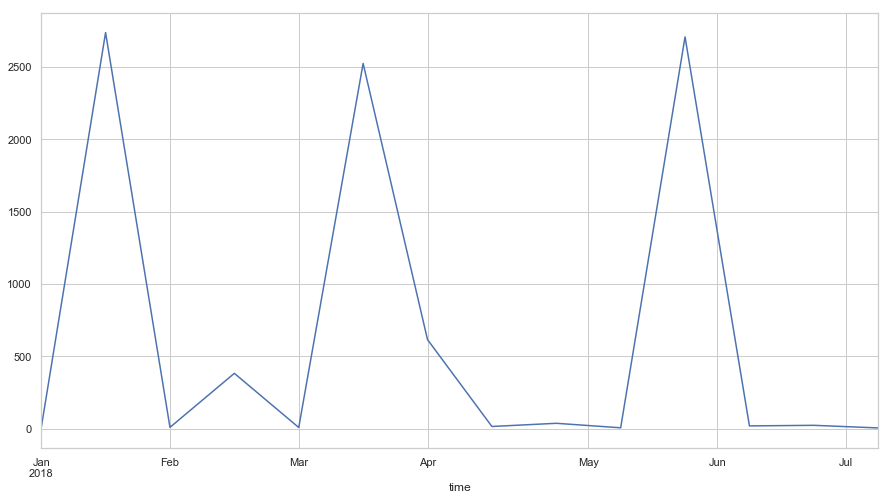

In [31]:
biweekly5117_orders.plot(figsize=(15,8))
#plt.yscale('log')

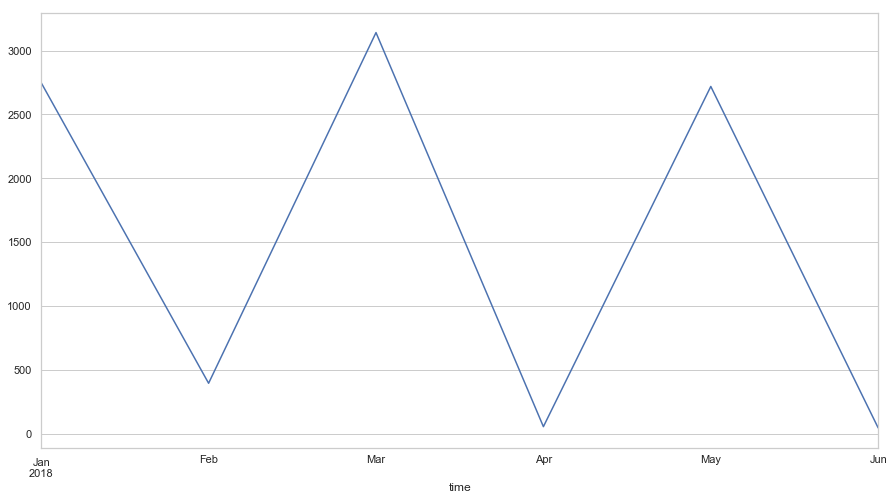

In [32]:
monthly5117_orders.plot(figsize=(15,8))

- Certain spikes in the purchasing frequency can be seen on certain days and months, in accordance with the barplots plotted previously.

- The demand is highly dependent on certain days, so daily resampling data should not be ignored when making forecasts.